   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       

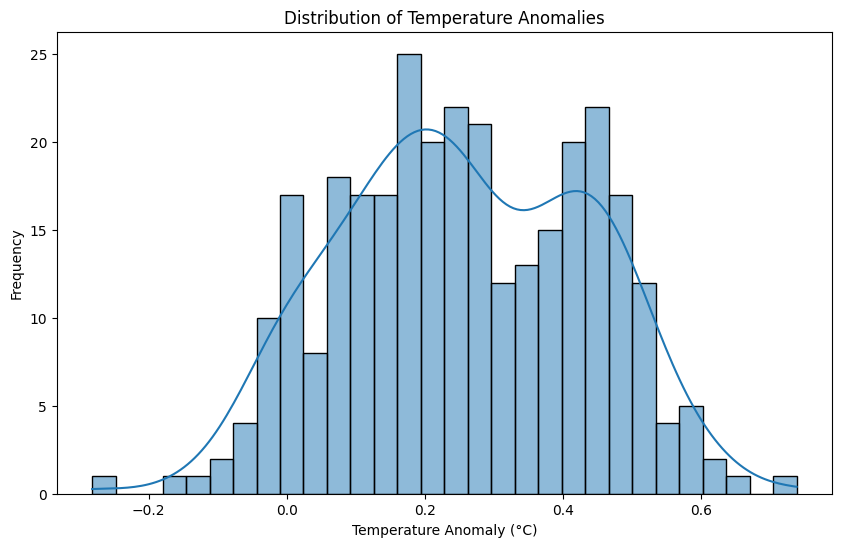

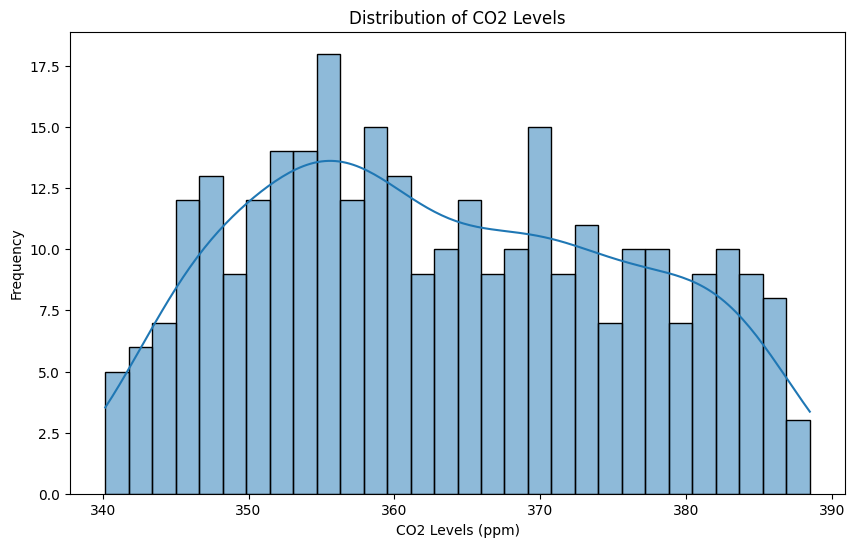

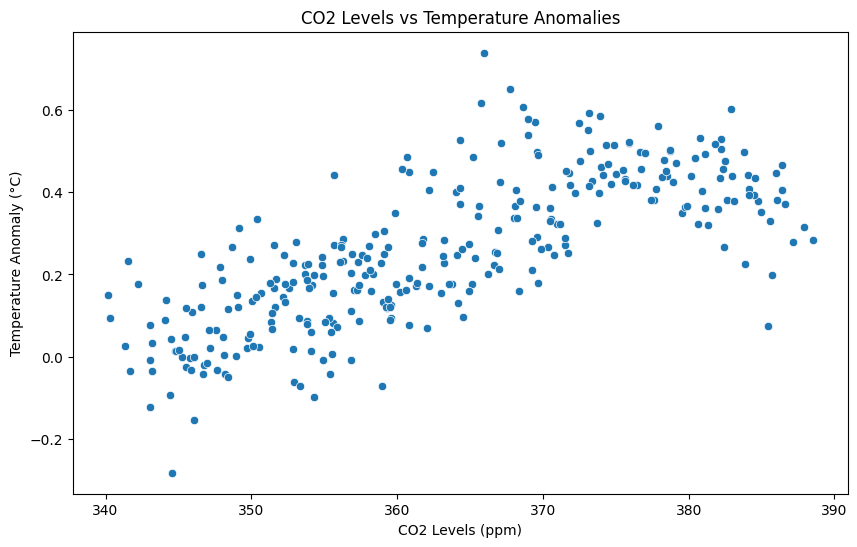

Correlation between CO2 and Temperature Anomaly: 0.7485046457380213


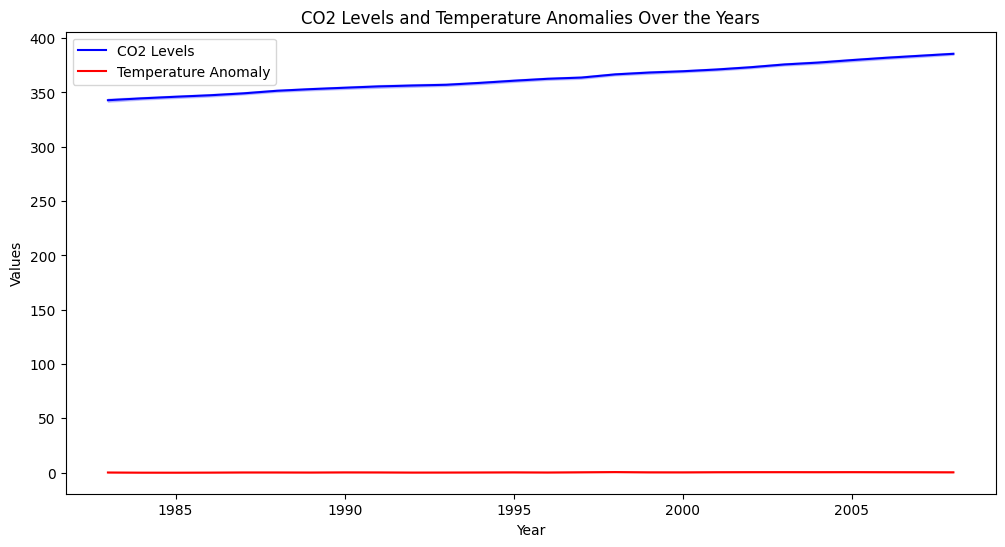

    Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
19  1984     12 -0.611  344.54  1672.15  305.313  207.308  372.701  1365.7617   

    Aerosols   Temp  z_score_CO2  z_score_Temp  
19    0.0188 -0.282     1.479954      3.013309  


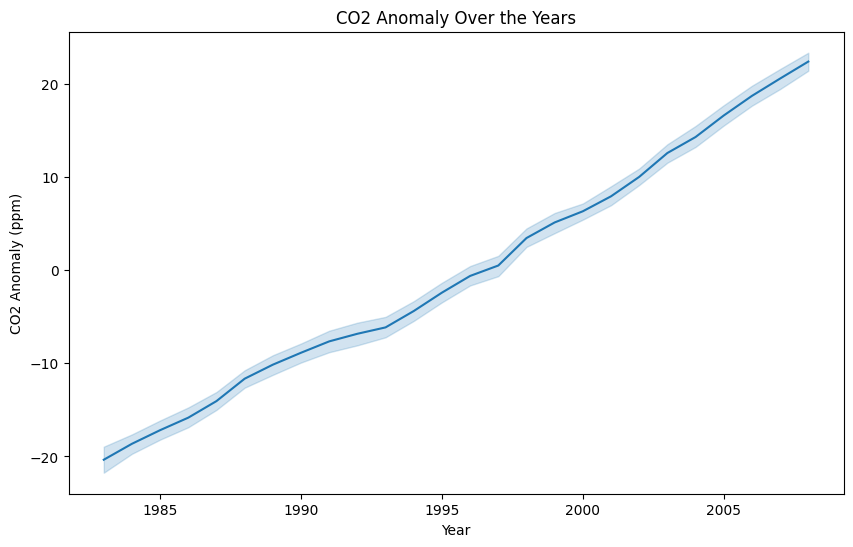

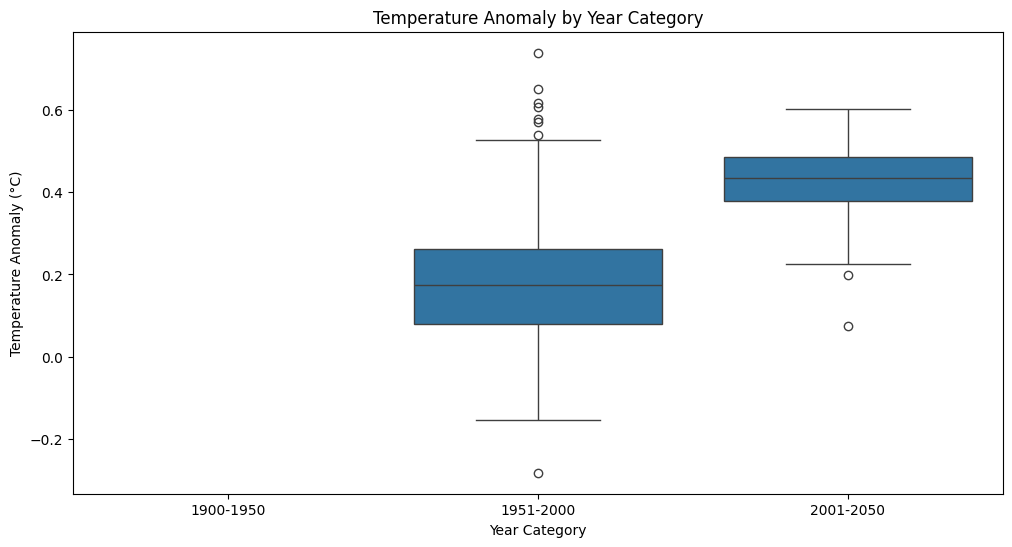

ValueError: could not convert string to float: '1951-2000'

<Figure size 800x600 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('climate_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

# Check for missing data
print(df.isnull().sum())

# Option 1: Drop missing values
df.dropna(inplace=True)

# Option 2: Fill missing values (for example, with the mean)
# df.fillna(df.mean(), inplace=True)

# Check the data types
print(df.dtypes)

# Convert data types if necessary
df['Year'] = df['Year'].astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df['Temp'], bins=30, kde=True)
plt.title('Distribution of Temperature Anomalies')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['CO2'], bins=30, kde=True)
plt.title('Distribution of CO2 Levels')
plt.xlabel('CO2 Levels (ppm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CO2', y='Temp')
plt.title('CO2 Levels vs Temperature Anomalies')
plt.xlabel('CO2 Levels (ppm)')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

# Calculate the correlation coefficient
correlation = df['CO2'].corr(df['Temp'])
print(f'Correlation between CO2 and Temperature Anomaly: {correlation}')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CO2', label='CO2 Levels', color='b')
sns.lineplot(data=df, x='Year', y='Temp', label='Temperature Anomaly', color='r')
plt.title('CO2 Levels and Temperature Anomalies Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

# Using Z-score for outlier detection
from scipy import stats

# Calculate z-scores for 'CO2' and 'Temp' columns separately
df['z_score_CO2'] = np.abs(stats.zscore(df['CO2']))
df['z_score_Temp'] = np.abs(stats.zscore(df['Temp']))

# Identify outliers based on either CO2 or Temp z-score exceeding threshold
outliers = df[(df['z_score_CO2'] > 3) | (df['z_score_Temp'] > 3)]

# Display outliers
print(outliers)

# Create a new feature: CO2 anomaly (compared to mean)
df['CO2_Anomaly'] = df['CO2'] - df['CO2'].mean()

# Create a year category
df['Year_Category'] = pd.cut(df['Year'], bins=[1900, 1950, 2000, 2050], labels=['1900-1950', '1951-2000', '2001-2050'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='CO2_Anomaly')
plt.title('CO2 Anomaly Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Anomaly (ppm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year_Category', y='Temp', data=df)
plt.title('Temperature Anomaly by Year Category')
plt.xlabel('Year Category')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

# Correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

# Pie chart for year categories
year_category_counts = df['Year_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(year_category_counts, labels=year_category_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Data by Year Category')
plt.show()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')